# Visualización de Datos

En esta sección buscamos expresar con una sola imagen información que sea destacable entre toda la cantidad de información que tenemos a nuestra disposición. Explicando lo que obtenemos de los datos de la forma másvisual posible.

Importaremos nuestros datos y los transformaremos para poder trabajar con ellos.

In [1]:
# Modificamos la ruta de trabajo (USAR SOLO UNA VEZ)
import os
print(os.getcwd())
os.chdir(".././")
print(os.getcwd())

c:\Users\ghost\OneDrive\PC_Casa\Ciencia_Datos_IA\2024-2025\2n Cuatri\Introducción a la Ciencia de Datos\Actividades\Portfolio\Practica2\notebooks
c:\Users\ghost\OneDrive\PC_Casa\Ciencia_Datos_IA\2024-2025\2n Cuatri\Introducción a la Ciencia de Datos\Actividades\Portfolio\Practica2


Una de las cosas que se pide es la distribución de las estaciones y el uso de bicicletas. Para ello podemos usar un mapa con las coordenadas de latitud y longitud, donde el tamaño de la circunferencia depende del uso de las bicicletas.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_estaciones_i = pd.read_csv("./data/interim/estaciones.csv", sep=",")
df_estaciones_i

,number,uso_bici,address,lat,lon,total,nombre,coddistrit,codbarrio
0,1,1078,C/GUILLEM DE CASTRO esquina con C/NA JORDANA,39.480042,-0.382929,25,EL CARME,1,3
1,2,1000,Salvador Giner - C. Museo,39.479889,-0.379748,15,EL CARME,1,3
2,3,1204,Plaza del Musico López Chavarri,39.476835,-0.380288,20,EL CARME,1,3
3,4,1401,Plaza de la Virgen - Bailía,39.476747,-0.375342,25,LA SEU,1,1
4,5,996,Plaza Poeta Llorente,39.476895,-0.371140,15,LA XEREA,1,2
...,...,...,...,...,...,...,...,...,...
268,272,673,Vicente la Roda - Ingeniero Fausto Elio,39.480623,-0.332190,15,LA MALVA-ROSA,11,3
269,273,340,Moraira - Alta del Mar,39.450305,-0.333272,15,NATZARET,11,5
270,274,216,San Francisco de Paula - Castell de Pop,39.448070,-0.333188,15,NATZARET,11,5
271,275,418,Moreras - Rona de Nazaret,39.452305,-0.335065,20,LA PUNTA,10,6


Usaremos seaborn para crearlo:

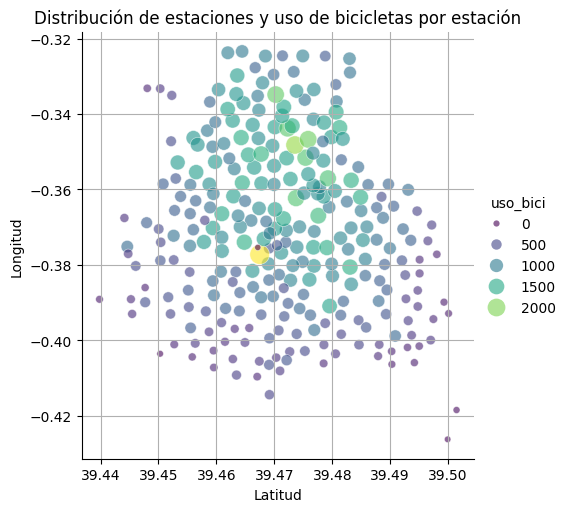

In [4]:
# Visualizamos la distribución de estaciones y el uso de bicicletas por estación
sns.relplot(data=df_estaciones_i, x="lat", y="lon", size="uso_bici", hue="uso_bici", palette="viridis", sizes=(20, 200), alpha=0.6, edgecolor="w")
plt.title("Distribución de estaciones y uso de bicicletas por estación")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.grid(True)
plt.show()



Visualizaremos el uso de bicicletas por horas en nuestro barrio de estudio.

In [5]:
df_barrios_aemet = pd.read_csv('./data/interim/usobarriosmeteo.csv', sep=",")
df_barrios_aemet

,prec,vmax,vv,hr,ta,tpr,tamin,tamax,fecha,uso_bici,name
0,0.0,2.5,0.9,72.0,6.5,1.9,6.4,7.1,2025-02-03 00:00:00+00:00,2.0,LA CARRASCA
1,0.0,2.1,0.5,71.0,6.3,1.5,6.2,6.6,2025-02-03 01:00:00+00:00,3.0,LA CARRASCA
2,0.0,2.5,1.1,71.0,6.0,1.1,6.0,6.3,2025-02-03 02:00:00+00:00,1.0,LA CARRASCA
3,0.0,2.6,0.4,70.0,5.8,0.9,5.8,6.2,2025-02-03 03:00:00+00:00,0.0,LA CARRASCA
4,0.0,2.1,0.5,70.0,5.7,0.6,5.7,5.9,2025-02-03 04:00:00+00:00,1.0,LA CARRASCA
...,...,...,...,...,...,...,...,...,...,...,...
47105,0.0,8.6,2.0,81.0,14.1,10.9,13.7,14.1,2025-03-03 06:00:00+00:00,1.0,SOTERNES
47106,0.0,9.2,2.1,81.0,14.3,11.1,14.1,14.4,2025-03-03 07:00:00+00:00,2.0,SOTERNES
47107,0.6,9.3,2.2,81.0,14.1,10.9,14.1,14.4,2025-03-03 08:00:00+00:00,0.0,SOTERNES
47108,1.5,8.0,2.3,81.0,14.3,11.1,14.0,14.4,2025-03-03 09:00:00+00:00,1.0,SOTERNES


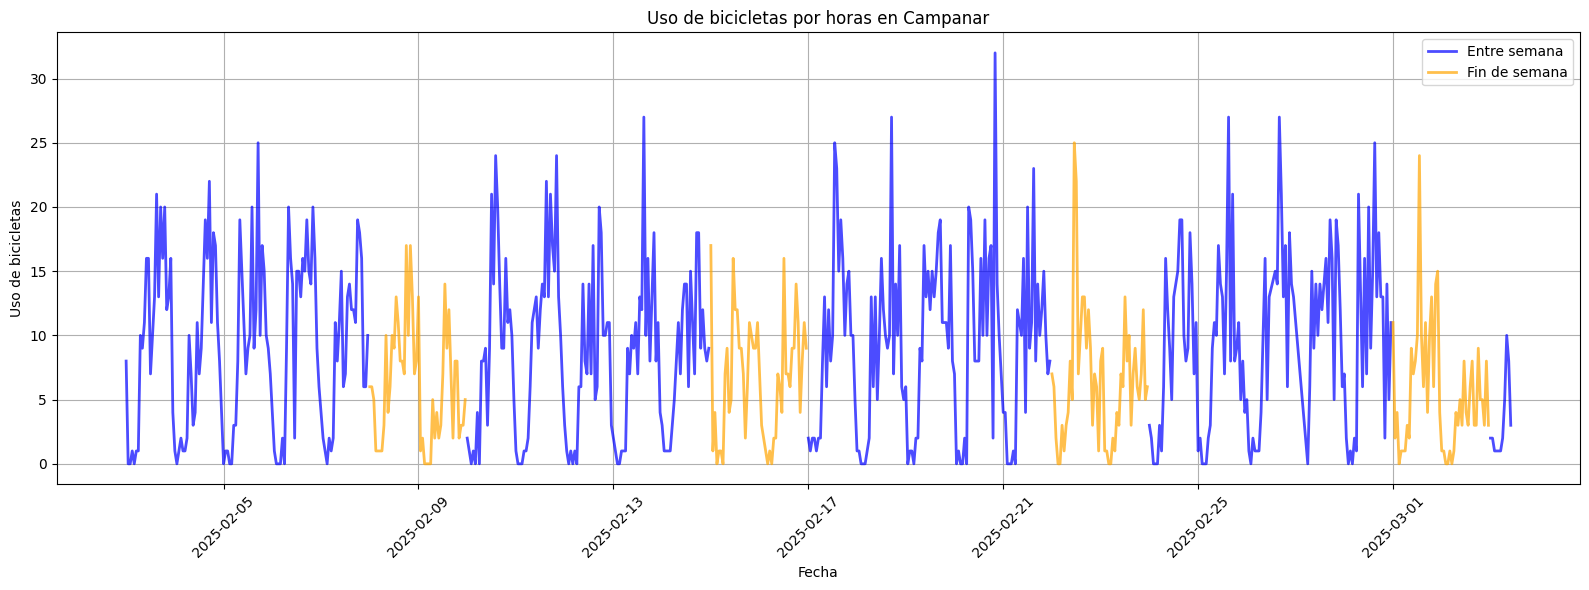

In [6]:
# Asegurar datetime y crear columna fin de semana
df_seleccion = df_barrios_aemet[df_barrios_aemet["name"] == "CAMPANAR"].copy()
df_seleccion["fecha"] = pd.to_datetime(df_seleccion["fecha"])
df_seleccion["dia_semana"] = df_seleccion["fecha"].dt.day_name()
df_seleccion["fin_semana"] = df_seleccion["dia_semana"].isin(["Saturday", "Sunday"])

# Crear DataFrame combinado con columnas separadas
df_plot = df_seleccion[["fecha", "uso_bici", "fin_semana"]].copy()

# Creamos dos columnas: entre semana y fin de semana, con NaN donde no corresponde
df_plot["entre_semana"] = df_plot["uso_bici"].where(df_plot["fin_semana"] == False)
df_plot["solo_fin_semana"] = df_plot["uso_bici"].where(df_plot["fin_semana"] == True)

# Graficar sobre el mismo eje sin líneas raras
plt.figure(figsize=(16, 6))
plt.plot(df_plot["fecha"], df_plot["entre_semana"], label="Entre semana", color="blue", lw=2, alpha=0.7)
plt.plot(df_plot["fecha"], df_plot["solo_fin_semana"], label="Fin de semana", color="orange", lw=2, alpha=0.7)

# Graficar visualización
plt.xlabel("Fecha")
plt.ylabel("Uso de bicicletas")
plt.title("Uso de bicicletas por horas en Campanar")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Ahora visualizaremos la relación entre el uso de bicicletas y las variables meterologicas. Primero eliminaremos las variables que no queremos usar:

<Figure size 1000x300 with 0 Axes>

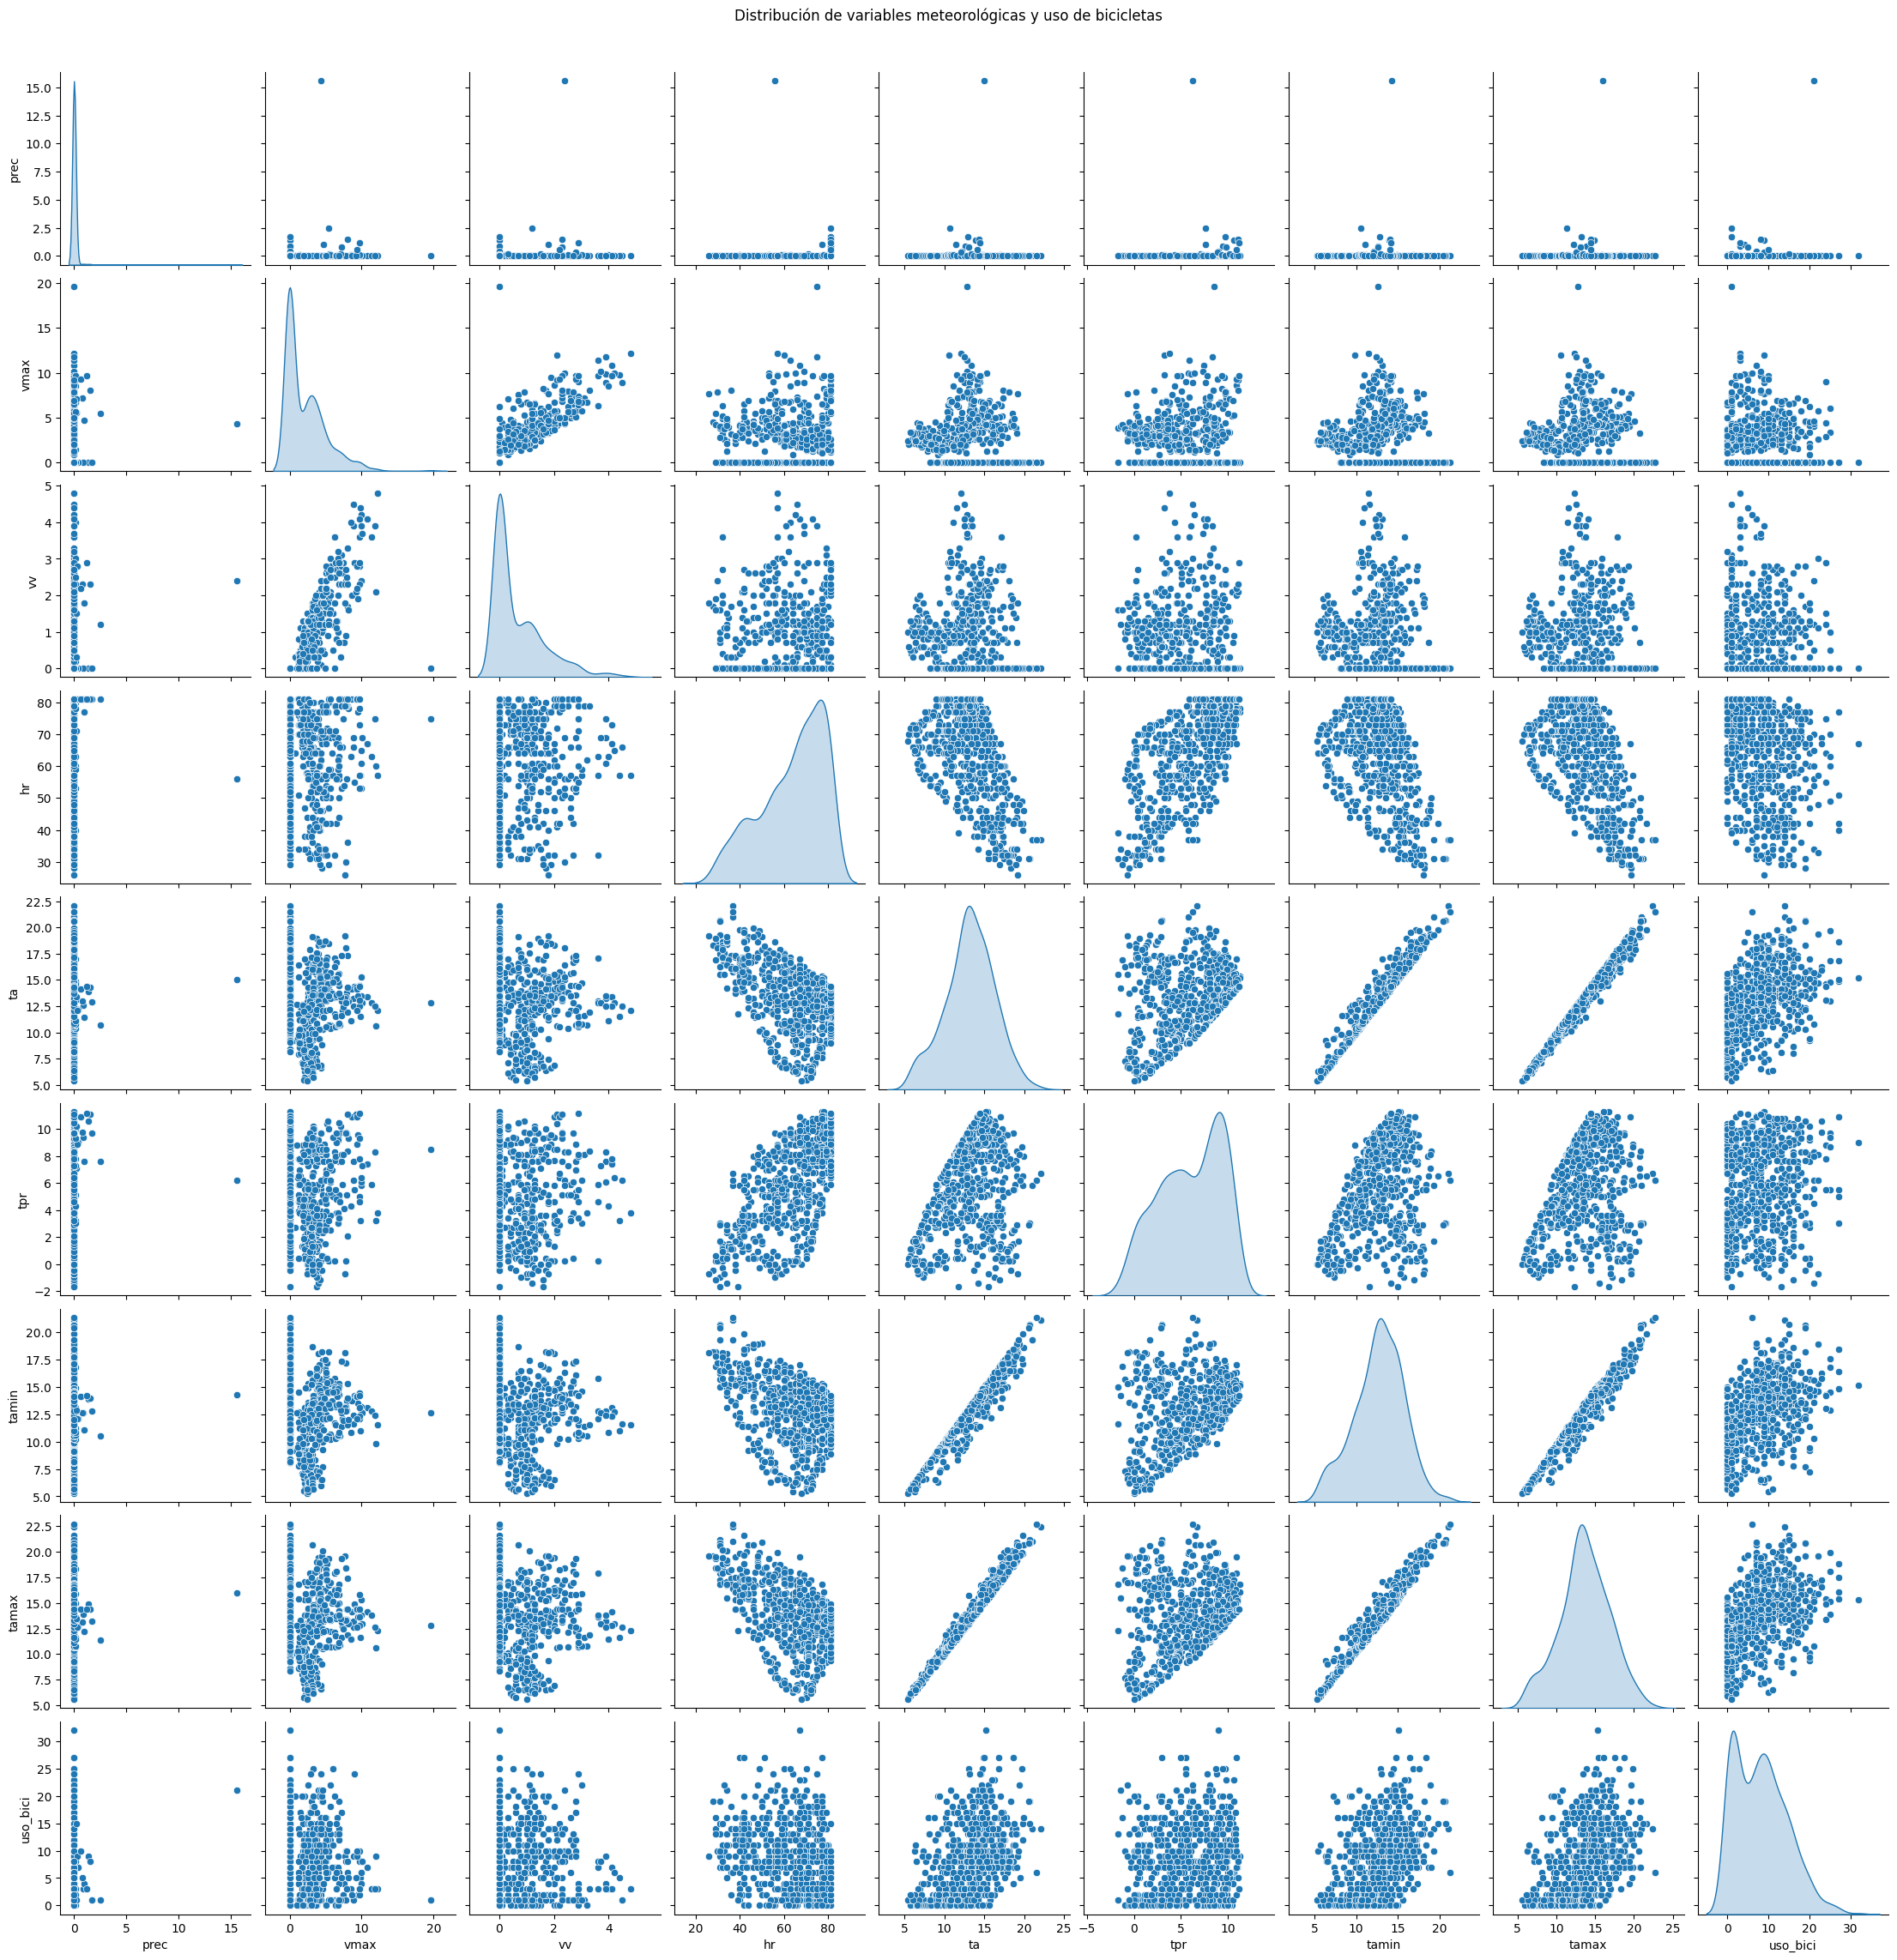

In [7]:
df_seleccion
df_seleccion_meteo = df_seleccion.drop(columns=["fin_semana", "dia_semana", "fecha", "name"])

# Visualización de las variables meteorológicas con el uso de bicicletas
plt.figure(figsize=(10, 3))
sns.pairplot(df_seleccion_meteo, diag_kind="kde")
plt.suptitle("Distribución de variables meteorológicas y uso de bicicletas", y=1.02)
plt.show()

C:\Users\ghost\AppData\Local\Temp\ipykernel_3104\856249248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="tamax", y="uso_bici", data=df_seleccion, palette="viridis")


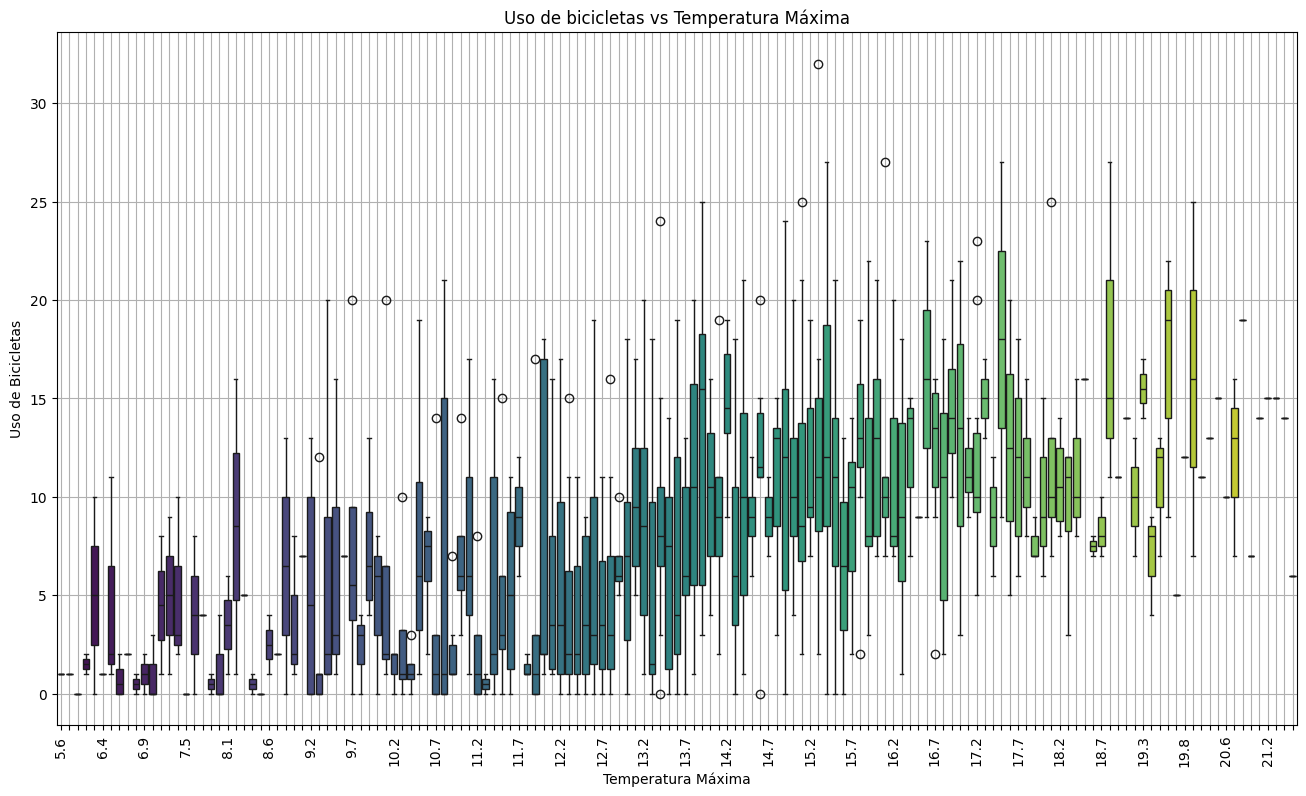

In [8]:
# Visualización de un boxplot
plt.figure(figsize=(16, 9))
sns.boxplot(x="tamax", y="uso_bici", data=df_seleccion, palette="viridis")
ax = plt.gca()  # obtener los ejes actuales
for i, label in enumerate(ax.get_xticklabels()):
    if i % 5 != 0:  # muestra solo una de cada 5 etiquetas (ajustable)
        label.set_visible(False)
plt.title("Uso de bicicletas vs Temperatura Máxima")
plt.xlabel("Temperatura Máxima")
plt.ylabel("Uso de Bicicletas")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()